### File 2
    *Are animal strikes increasing or decreasing over time?
    *Which phase of the flight reports the most animal strikes?
    *What phase of flight has the most injuries and fatalities?
    *Where on the aircraft most likely to get damages during a strike?
  


In [1]:
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path = 'Data/database.csv'
df = pd.read_csv(file_path, low_memory=False)  #low memory imput to avoid warning message

#below code used to get header level information
# df.info()
#getting some header level info 
#df[['Height', 'Injuries', 'Fatalities']].describe()

# column notes:
# Species Quantity values: '1', '2-10', nan, '11-100', 'Over 100' 

Std Deviation Height is 1803.65; Max height per strike event is 31,300 ft and min height is 0 ft
Max injuries is 100
Max fatalities is 8

Animal kingdom breakdown:
BIRD 96.9% MAMMAL 3.0% REPTILE 0.1%

In [3]:
subset_df = df[["Incident Year","Incident Month","Airport","Airport ID", "State","Aircraft","Aircraft Type", "Flight Phase", "Species Name","Species ID","Species Quantity"]]
subset_df.to_csv("Data/data_subset.csv")


# Are animal strikes increasing or decreasing over time?

In [4]:
##Selom \/ \/ \/ 
# Frequency of strikes by year
all_strikes = ["Radome Strike","Windshield Strike","Nose Strike","Engine1 Strike", "Engine2 Strike",
                "Engine3 Strike","Engine4 Strike", "Propeller Strike", "Wing or Rotor Strike",
                "Fuselage Strike","Landing Gear Strike", "Tail Strike", "Lights Strike", "Other Strike"]
all_strikes = df[["Incident Year","Airport"]].loc[subset_df["Incident Year"]!= 2015]
data_table = all_strikes.groupby("Incident Year").count()
# data_table

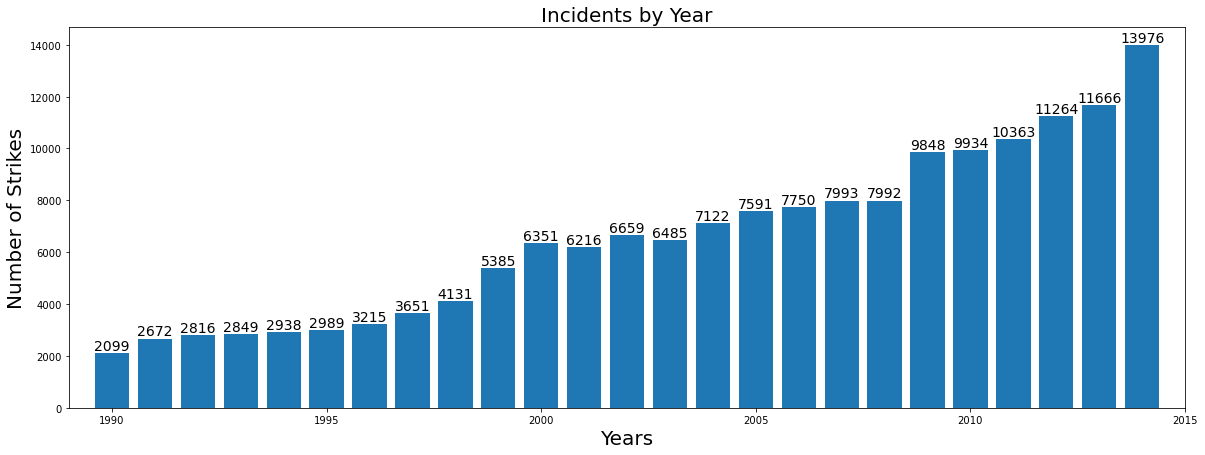

In [5]:
# Incidents/strikes by year
x_axis = data_table.index
y_axis = data_table["Airport"]
plt.figure(figsize=(20,7))
plt.bar(x_axis, y_axis)
plt.title("Incidents by Year", fontsize=20)
plt.xlabel("Years", fontsize=20)
plt.ylabel("Number of Strikes", fontsize=20)
plt.plot(color="#20F216", fontsize=20)
plt.xlim(1989, 2015)
y_list = list(y_axis)

for i in range(len(y_list)):
    plt.annotate(str(y_list[i]), xy=(x_axis[i],y_list[i]), ha='center', va='bottom', fontsize=14)
    
plt.savefig("Images/Incidentsbyyear.png", dpi=100) 

plt.show()

The graph shows the evolution of the strikes over the years. Apparently, the incidents keep on increasing every year. Maybe, the number of strikes is increasing because of the number of flight operations. Or, maybe the increase of strikes is related to an improvement of incidents reporting - the FAA (Federal Aviation Administration) is capturing the data better than before.

In [6]:
##Selom /\ /\ /\ 
#looking up single event for googling
#df[["Incident Year","Incident Month","Airport ID","FAA Region","Operator","State","Flight Phase","Fatalities"]].loc[df["Fatalities"]==8]
# Alyssa  \/\/\/

In [7]:
#create animal kingdom column in dataframe and populate it for birds/mammals/reptiles involved in airplane incidents.
subset_wkingdom_df = subset_df
#most things in the list are birds, set everything to bird intially
subset_wkingdom_df["Animal_Kingdom"]= "BIRD"
#mammals have species id that starts w/1
subset_wkingdom_df["Animal_Kingdom"]= np.where(subset_wkingdom_df['Species ID'].str.startswith('1',na=False), "MAMMAL",subset_wkingdom_df["Animal_Kingdom"])
#repiles start with 2
subset_wkingdom_df["Animal_Kingdom"]= np.where(subset_wkingdom_df['Species ID'].str.startswith('2',na=False), "REPTILE",subset_wkingdom_df["Animal_Kingdom"])
subset_wkingdom_df.to_csv("Data/data_subset_wKingdom.csv")


In [8]:
#checkout breakdown as %s
#subset_wkingdom_df["Animal_Kingdom"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
# output from above line is displayed in the 4th cell of this file


## Which phase of the flight reports the most animal strikes?

In [9]:
subset_df["Flight Phase"].value_counts()
flightphase= subset_df.groupby(['Flight Phase'])
flightphase = flightphase['Incident Year'].count().reset_index().rename(columns={"Incident Year":"Count"})
flightphase = flightphase.sort_values(by='Count',ascending=False).reset_index(drop = True)
#print(flightphase.Count.sum())  check count of sum == the total of non-NaN rows for flight phase 118802

print("Total rows that contain Flight Phase data: "+str(df["Flight Phase"].notnull().sum()))  #118802 rows have flight phase data
#len(df[df["Flight Phase"].isna()])+df["Flight Phase"].notnull().sum() #55302 rows have no flight phase + 118802 = 174104 total rows from orig dataset

#the bottom 6 parts of flight make up only ~1% of the total, so pulled those together to new category "Other"
others_label=flightphase["Flight Phase"][6:]
others_total=flightphase.Count[6:].sum()
new_row = {'Flight Phase':'OTHER', 'Count':others_total}
#append row to the dataframe
flightphase = flightphase.append(new_row, ignore_index=True)
#reorder to move "other" row up to index 6
flightphase = flightphase.sort_values(by='Count',ascending=False).reset_index(drop = True)


Total rows that contain Flight Phase data: 118802


In [10]:
#print(list(others_label))
olist=list(others_label)
#for label in others_label:
#    print(label)
#join makes things a string, between every item, tell it what to put inbetween before the join
# this output was pasted into summary after the pie: 
#print(f"Other category includes the following: {', '.join(olist)}")

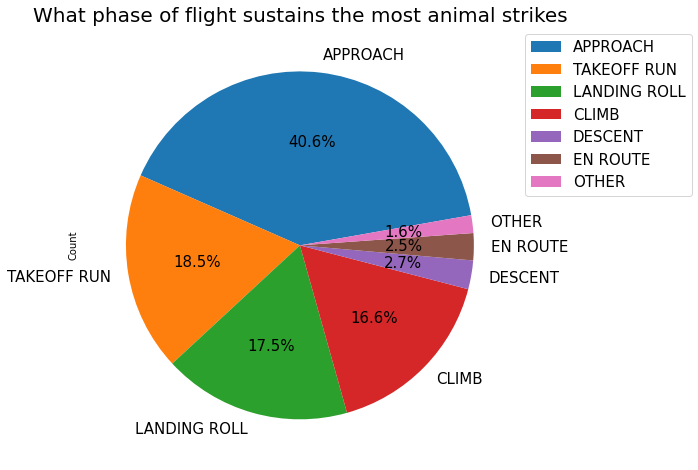

In [11]:
#plot data
pieLabels = flightphase["Flight Phase"][0:7]
#
pies = flightphase[0:7].plot.pie(y="Count",figsize=[10, 8],labels=pieLabels,autopct='%1.1f%%',startangle=10, fontsize=15)
pies.set_aspect('equal')
pies.legend(loc='center left', bbox_to_anchor=(1, .8), fontsize=15) #move legend off the pie
plt.title("What phase of flight sustains the most animal strikes", fontsize=20)
plt.savefig("Images/Flightphase.png", dpi=100) 


Total rows that contain Flight Phase data: 118802 There are 12 unique phases of flight, the bottom 6 make up only ~1% of the total, so pulled those together to new category "Other". Other includes the following flight phases: LANDING, TAXI, DEPARTURE, LOCAL, ARRIVAL, PARKED.

Approach makes up the majority of animal encounters at 40%.

**Vocabulary**:
Approach – The phase of flight when the pilot intends to land on the runway. There are different types of approaches, depending on whether the pilot is flying VFR or IFR.

Climb – The act of increasing aircraft altitude, typically to a designated level.

Descent – The act of decreasing aircraft altitude, typically to a designated level.

Landing Roll- the movement of an aircraft from touchdown through deceleration to taxi speed or full stop.

Takeoff Run - The distance traveled by an airplane from the commencement of takeoff to the point when it leaves the ground or water.  vocab source: https://epicflightacademy.com/aviation-terminology/

## What phase of flight has the most injuries and fatalities?

The original dataset has 174104 rows (incidents of animal strikes). For flight phase injury and fatality graphs, removed all rows that had NULL values for phase of flight (brings it down to 118802 rows).   Then dropped rows that were NULL for both injury and fatality which brings the dataset down to 237 rows.  Filled ramaining NULLs with 0 for grouping/summing. 

In [12]:
injuryFatality_df = df[['Flight Phase','Injuries', 'Fatalities','Record ID']]  #narrow the column list
injuryFatality_df = injuryFatality_df[injuryFatality_df['Flight Phase'].notna()]  #drop rows w/NaN flight phase 118802 remaining
#drop rows where both injury and fatality are NaN.(ie keep rows that have either a nonna injury or non-na fatality)
injuryFatality_df = injuryFatality_df[(injuryFatality_df['Injuries'].notna()) | (injuryFatality_df['Fatalities'].notna()) ]
#another way to do the same thing below:
#injuryFatality_df =injuryFatality_df.dropna(axis =0, subset=['Injuries', 'Fatalities'], how='all') #drop if both injuries and fatalities are nan
#print(injuryFatality_df.shape) #787 rows the subset way

injuryFatality_df=injuryFatality_df.fillna(0) #fill remaining nas w/0s

#keep only rows that have fatality or injury > 0
injuryFatality_df = injuryFatality_df[(injuryFatality_df['Injuries'] > 0) | (injuryFatality_df['Fatalities'] > 0) ]
#print(injuryFatality_df.shape)  #down to 237 rows


inj_fat_gb=injuryFatality_df.groupby(['Flight Phase','Injuries', 'Fatalities']).count().rename(columns={"Record ID":"Count"})
inj_fat_gb.reset_index(inplace=True) #drop the index so can use those values are regular columns

#each row has a # of injuries/fatalities per event, and then a count for the group by done above.  
#need to multiple the # of injuries * count to get total injuries
inj_fat_gb["Total_inj"]=inj_fat_gb['Injuries']*inj_fat_gb['Count']
inj_fat_gb["Total_fat"]=inj_fat_gb['Fatalities']*inj_fat_gb['Count']
inj_fat_gb  #keeping this output so can talk about it

,Flight Phase,Injuries,Fatalities,Count,Total_inj,Total_fat
0,APPROACH,1.0,0.0,38,38.0,0.0
1,APPROACH,2.0,0.0,8,16.0,0.0
2,APPROACH,7.0,0.0,1,7.0,0.0
3,CLIMB,0.0,5.0,1,0.0,5.0
4,CLIMB,1.0,0.0,21,21.0,0.0
5,CLIMB,2.0,0.0,6,12.0,0.0
6,CLIMB,100.0,0.0,1,100.0,0.0
7,DESCENT,0.0,1.0,1,0.0,1.0
8,DESCENT,1.0,0.0,13,13.0,0.0
9,DESCENT,2.0,0.0,3,6.0,0.0


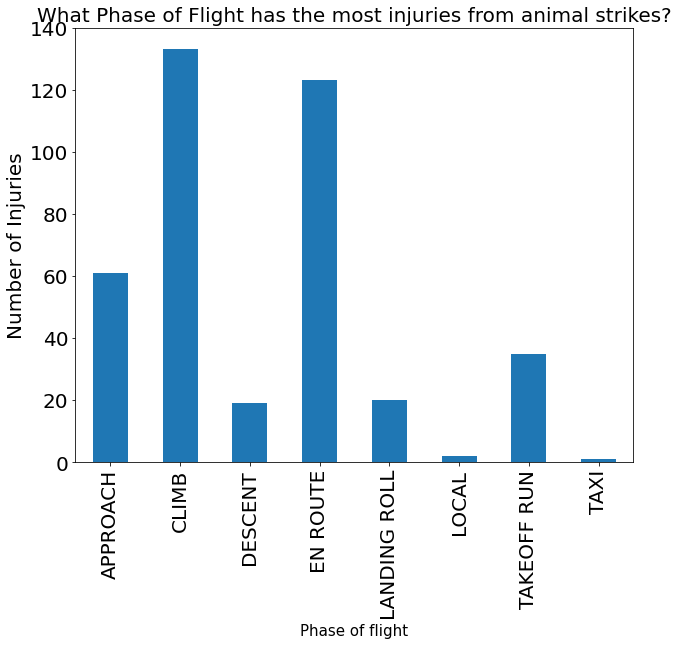

In [13]:
injury_tots=inj_fat_gb.groupby(['Flight Phase']).sum()  #group by again to sum up the total injury data called in prev cell.
injury_tots["Total_inj"].plot(kind="bar",figsize=(10,8), fontsize=20)
plt.xlabel('Phase of flight', fontsize=15) # Label the x axis 
plt.ylabel("Number of Injuries", fontsize=20)  # Label the y axis
plt.title("What Phase of Flight has the most injuries from animal strikes?", fontsize=20)
plt.ylim(0,140)
plt.savefig("Images/Injuries.png", dpi=100) #this is cutting off the labels.

The Climb data is skewed due to a single event. 100 injured flying out of LGA, plane landed in the hudson. (Perhaps you've heard of this event, it became a Tom Hanks movie.)  It's the single event in this data that had more than 7 injuries.  

If you took out this single climb event, en route becomes the phase with the most injuries.

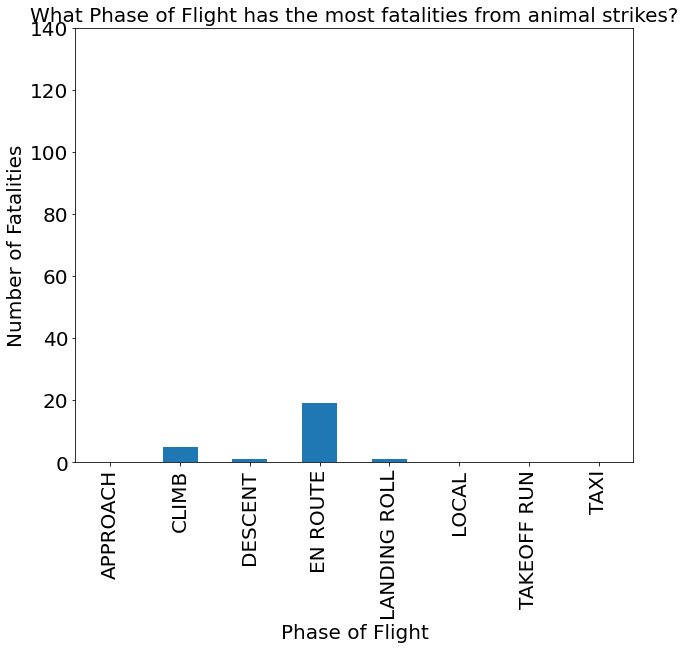

In [14]:
injury_tots=inj_fat_gb.groupby(['Flight Phase']).sum()
injury_tots["Total_fat"].plot(kind="bar",figsize=(10,8), fontsize=20)
plt.xlabel('Phase of Flight', fontsize=20) # Label the x axis 
plt.ylabel("Number of Fatalities", fontsize=20)  # Label the y axis
plt.title("What Phase of Flight has the most fatalities from animal strikes?", fontsize=20)
plt.ylim(0,140)
plt.savefig("Images/Fatalities.png", dpi=100) 

Kept the same Y axis range so this data can be more readily compared to the Injury data.  Can see en route has the highest instances of fatalities.

Note FAA data includes private carriers and helicopters. 8 of the en route deaths are from a single helicopter crash in 2009.  Most of the events that involve fatalities have only 1 or 2.

## Where on the aircraft most likely to get struck or damaged during a strike? 
Original dataset has columns for each part of the plane for location of strike (ex. "Windshield Strike") and damage (ex. "Windshield Damage").  The data is 1/0 true/false for each.

In [15]:
damage_subset_df = df[["Airport ID","Species Quantity","Fatalities","Injuries","Aircraft Damage","Radome Strike","Radome Damage","Windshield Strike","Windshield Damage","Nose Strike","Nose Damage","Engine1 Strike","Engine1 Damage","Engine2 Strike","Engine2 Damage","Engine3 Strike","Engine3 Damage","Engine4 Strike","Engine4 Damage","Engine Ingested","Propeller Strike","Propeller Damage","Wing or Rotor Strike","Wing or Rotor Damage","Fuselage Strike","Fuselage Damage","Landing Gear Strike","Landing Gear Damage","Tail Strike","Tail Damage","Lights Strike","Lights Damage","Other Strike","Other Damage"]]


In [16]:
#sum each of the columns in the damage_subset_df and put that data into variable and make it a df.
stk_dmg_totals =damage_subset_df[["Radome Strike","Radome Damage","Windshield Strike","Windshield Damage","Nose Strike","Nose Damage","Engine1 Strike","Engine1 Damage","Engine2 Strike","Engine2 Damage","Engine3 Strike","Engine3 Damage","Engine4 Strike","Engine4 Damage","Engine Ingested","Propeller Strike","Propeller Damage","Wing or Rotor Strike","Wing or Rotor Damage","Fuselage Strike","Fuselage Damage","Landing Gear Strike","Landing Gear Damage","Tail Strike","Tail Damage","Lights Strike","Lights Damage","Other Strike","Other Damage"]].sum()
stk_dmg_totals = stk_dmg_totals.to_frame()
stk_dmg_totals.rename(columns={0:"Count"}, inplace =True)  #rename column
#stk_dmg_totals

In [17]:
#order the strike data and then graph the top 10
orderd_stk_dmg=stk_dmg_totals.sort_values("Count",ascending=False)

#comment in for single graph strike/damage it put together below
#plot the top 10 places on a the plan struck by animals
#orderd_stk_dmg[0:10].plot(kind="bar", color="green",figsize=(24,14), fontsize=25)
#plt.xlabel('Where on the Plane', fontsize=25) # Label the x axis 
#plt.ylabel("Number of Bird Strikes ", fontsize=25)  # Label the y axis
#plt.title("Where on the plane sustains the most animal strikes? (top 10 graphed)", fontsize=25)

#plt.savefig("Images/AnimalStrikeWhere.png", dpi=100) 


In [18]:
#take out just the "Damage" columns and order them descending
dmg_only = stk_dmg_totals.loc[stk_dmg_totals.index.str.contains('Damage')].sort_values("Count",ascending=False)

#comment in for single graph strike/damage it put together below
#plot the top 10 places that reported damage from the animal strike
#dmg_only[0:10].plot(kind="bar", color="orange",figsize=(24,18), fontsize=25)
#plt.xlabel('Where on the Plane', fontsize=25) # Label the x axis 
#plt.ylabel("Number of Bird Strikes ", fontsize=25)  # Label the y axis
#plt.title("Where on the plane sustains damage from animal strikes? (top 10 graphed)", fontsize=25)
#plt.savefig("Images/AnimalDamageWhere.png", dpi=100)

In [19]:
#renaming the indexes between the strike and damage to just be the place on the plane
#and no longer contain the word 'strike' or 'damage' after

strike_df=orderd_stk_dmg[0:10]
#Replacing "Engine Ingested" with lights in strike data for comparison w/damage.  
#Because "injested" doesn't really indicated damage or not, just that an animal was injested
strike_df.rename(index={'Windshield Strike':'Windshield', 'Nose Strike':'Nose', 'Wing or Rotor Strike':'Wing or Rotor',
                       'Radome Strike':'Random', 'Fuselage Strike':'Fuselage', 'Other Strike':'Other', 'Engine1 Strike':'Engine1',
                       'Landing Gear Strike':'Landing Gear', 'Engine2 Strike':'Engine2','Engine Ingested':'Lights' },inplace=True)#,
strike_df.at['Lights','Count']=orderd_stk_dmg.at['Lights Strike','Count']
strike_df = strike_df.sort_values("Count",ascending=False)
damage_df=dmg_only[0:10].copy()
damage_df.rename(index={'Windshield Damage':'Windshield', 'Nose Damage':'Nose', 'Wing or Rotor Damage':'Wing or Rotor',
                       'Radome Damage':'Random', 'Fuselage Damage':'Fuselage', 'Other Damage':'Other', 'Engine1 Damage':'Engine1',
                       'Landing Gear Damage':'Landing Gear', 'Engine2 Damage':'Engine2','Lights Damage':'Lights' },inplace=True)


damage_df=damage_df.reindex(strike_df.index)

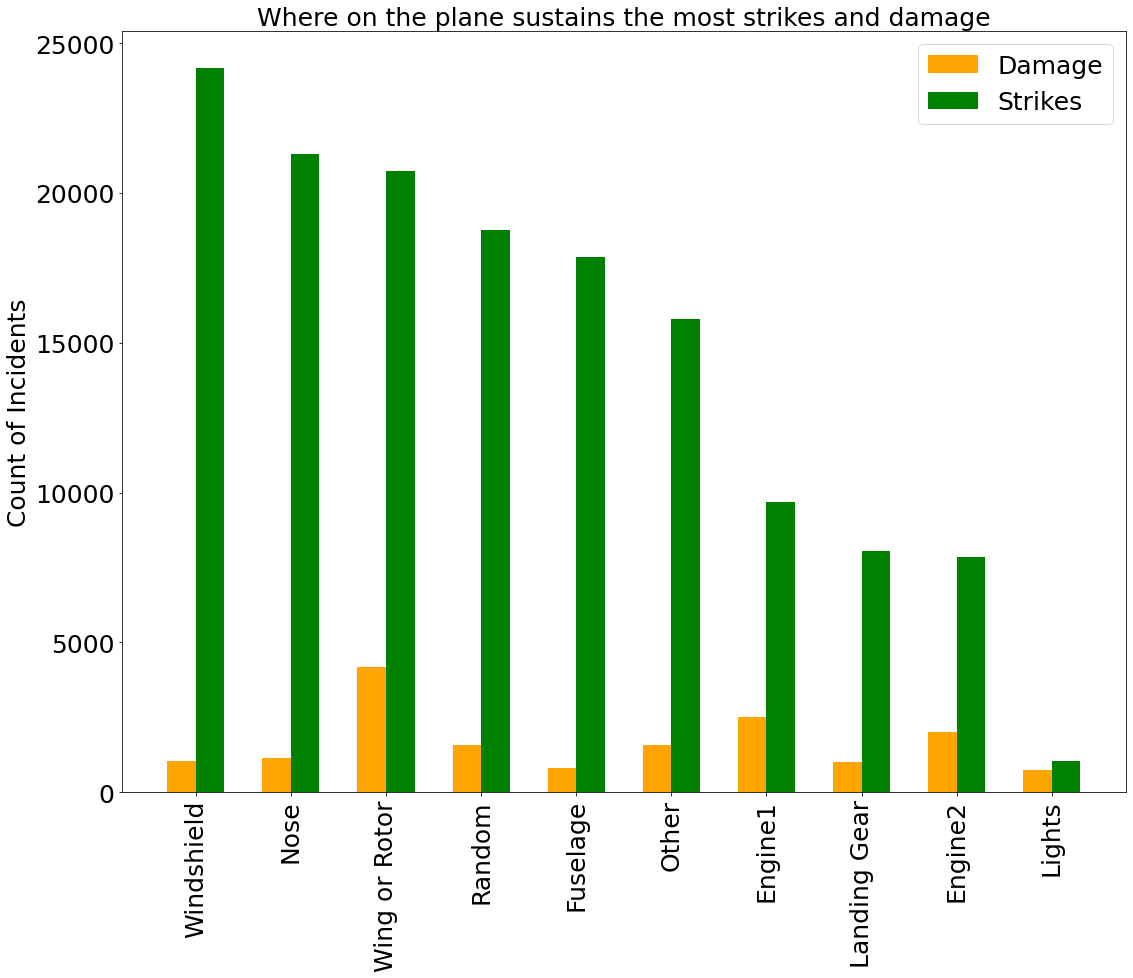

<Figure size 432x288 with 0 Axes>

In [20]:
x_axis=strike_df.index
x = np.arange(10)

fig, ax = plt.subplots(figsize = (18,14)) 

dam=ax.bar(x, damage_df['Count'], width=0.3, color='orange', align='center')
stk=ax.bar(x+0.3, strike_df['Count'], width=0.3, color='g', align='center')

plt.ylabel('Count of Incidents', fontsize=25)
plt.title('Where on the plane sustains the most strikes and damage', fontsize=25)
plt.xticks(x+0.15, x_axis, rotation='vertical', fontsize=25)
plt.yticks(fontsize=25)
plt.legend([dam, stk],['Damage', 'Strikes'], fontsize=25)
plt.show()
plt.savefig("Images/StrikeDamageONEgraph.png", dpi=100)

Took the top 10 places on the plane to sustain damage and compared those against the number of strikes.
Graph shows the windshield and nose are most commonly struck, but the wing/rotor are the most likely places to be damaged.  Though the windsheild is most likely to be hit, it is the 7th most likely place to be damaged by the strike.

This dataset removes "Engine Injested" data, there were ~9k instances of this, the data only indicated if an animal was injested, not if it damaged the engine, or which engine did the injesting.

In [21]:
damage_pct=orderd_stk_dmg  #

In [22]:
# calculate the % of strikes that caused damage for the top 10 parts of plane to be hit

damage_pct["StrikeDamage%"] = 0.00  #add new column
#take each plane location damange count and divide by strike count to get the % of strikes that caused damage
damage_pct.at['Radome Damage','StrikeDamage%'] = damage_pct.at['Radome Damage','Count']/damage_pct.at['Radome Strike','Count']*100
damage_pct.at['Windshield Damage','StrikeDamage%'] = damage_pct.at['Windshield Damage','Count']/damage_pct.at['Windshield Strike','Count']*100
damage_pct.at['Nose Damage','StrikeDamage%'] = damage_pct.at['Nose Damage','Count']/damage_pct.at['Nose Strike','Count']*100
damage_pct.at['Wing or Rotor Damage','StrikeDamage%'] = damage_pct.at['Wing or Rotor Damage','Count']/damage_pct.at['Wing or Rotor Strike','Count']*100
damage_pct.at['Fuselage Damage','StrikeDamage%'] = damage_pct.at['Fuselage Damage','Count']/damage_pct.at['Fuselage Strike','Count']*100
damage_pct.at['Other Damage','StrikeDamage%'] = damage_pct.at['Other Damage','Count']/damage_pct.at['Other Strike','Count']*100
damage_pct.at['Engine1 Damage','StrikeDamage%'] = damage_pct.at['Engine1 Damage','Count']/damage_pct.at['Engine1 Strike','Count']*100
damage_pct.at['Landing Gear Damage','StrikeDamage%'] = damage_pct.at['Landing Gear Damage','Count']/damage_pct.at['Landing Gear Strike','Count']*100
damage_pct.at['Engine2 Damage','StrikeDamage%'] = damage_pct.at['Engine2 Damage','Count']/damage_pct.at['Engine2 Strike','Count']*100
damage_pct.at['Lights Damage','StrikeDamage%'] = damage_pct.at['Lights Damage','Count']/damage_pct.at['Lights Strike','Count']*100
damage_pct= damage_pct.loc[damage_pct['StrikeDamage%']>0]

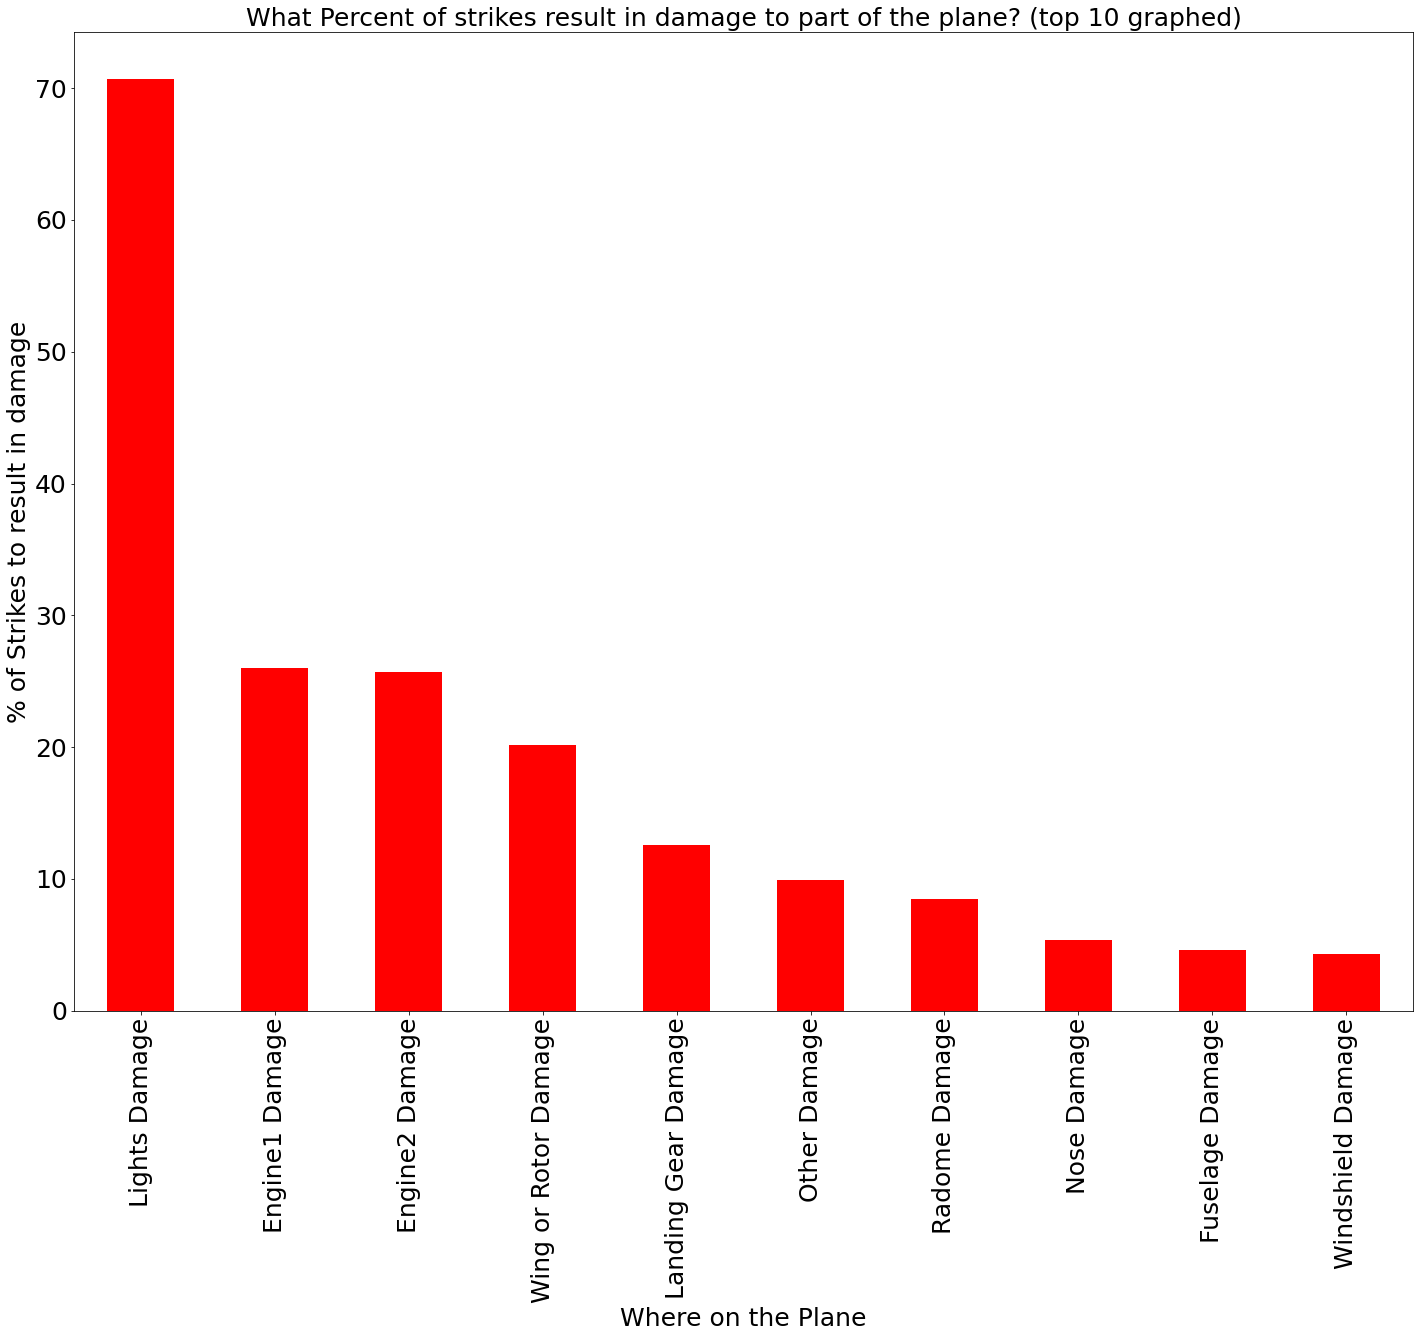

In [23]:
#calculate the overall % of strikes that caused damage 
overallDamage_v_strikes = damage_subset_df["Aircraft Damage"].value_counts().to_frame()
pct = round(overallDamage_v_strikes.loc[1]/overallDamage_v_strikes.loc[0]*100,2)
#print(f"Overall {pct[0]}% Animal strikes resulted in damage to the aircraft." )  #output pasted in below summary

#plot percent of strikes that resulted in damage top 10 parts of plane
damage_pct_orderd= damage_pct.sort_values("StrikeDamage%",ascending=False)
#damage_pct_orderd
damage_pct_orderd["StrikeDamage%"].plot(kind="bar",color="red", figsize=(24,18), fontsize=25)
#damage_pct_orderd= damage_pct.sort_values("StrikeDamage%",ascending=False)
#damage_pct_orderd
plt.xlabel('Where on the Plane', fontsize=25) # Label the x axis 
plt.ylabel("% of Strikes to result in damage", fontsize=25)  # Label the y axis
plt.title("What Percent of strikes result in damage to part of the plane? (top 10 graphed)", fontsize=25)
plt.savefig("Images/AnimalDamageStikeHowmuch.png", dpi=100) 


Overall 9.41% Animal strikes resulted in damage to the aircraft.  
Differentiating by part of the plane, can see an animal strike causes damage 70% of the time when it hits the aircraft's lights, followed by Engine 1 and 2 with 25% each.

## Post Mortem
 
 What else would we want to look into? 
 There were a bunch of other columns we didn't get to look into.  It would be interesting to group data by other columns in the dataset such as type of aircraft, or altitude.
 
Given more time, we would've researched a second dataset of overall flight information for this same time period so we could compare against 2 questions:
 Are animal strikes increasing or decreasing over time?
 Which month of the year has most animal strikes?
To be able to tell if there are just more flights, and therefore more strikes.

